In [1]:
# Notebook name: 02_EDA_and_Risk_Profiling.ipynb

# Cell 1: Imports and Load Merged Data (Corrected)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 1. Define the correct path to the output folder
DATA_DIR = "../outputs"
FILE_NAME = "merged_application.parquet"

# 2. Construct the full file path
file_path = os.path.join(DATA_DIR, FILE_NAME)

# 3. Load the data using pd.read_parquet
# Note: Use read_parquet, not read_csv!
try:
    df = pd.read_parquet(file_path)
    print(f"✅ Data loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    print(f"❌ Error: File not found at {file_path}. Please check Notebook 1's save path.")

# Check the first few rows to confirm load
df.head()

✅ Data loaded successfully. Shape: (307511, 368)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,cc__SK_DPD__max,cc__SK_DPD__min,cc__SK_DPD__sum,cc__SK_DPD__std,cc__SK_DPD_DEF__count,cc__SK_DPD_DEF__mean,cc__SK_DPD_DEF__max,cc__SK_DPD_DEF__min,cc__SK_DPD_DEF__sum,cc__SK_DPD_DEF__std
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


Text(0.5, 1.0, 'Default Distribution')

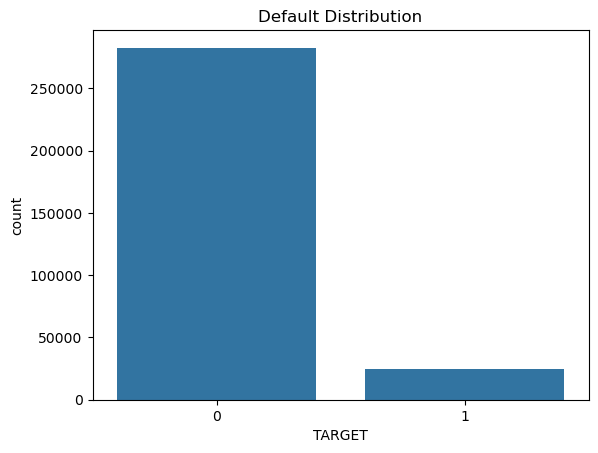

In [2]:
#2. Target Variable Distribution
#Default vs Non-Default customers
df['TARGET'].value_counts(normalize=True) * 100
sns.countplot(data=df, x='TARGET')
plt.title("Default Distribution")

In [3]:
#3. Missing Value Analysis
#Systematic vs Random missingness (important for Risk)
missing = df.isnull().mean().sort_values(ascending=False)*100
missing.head(20)


COMMONAREA_AVG              69.872297
COMMONAREA_MEDI             69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_AVG        68.354953
FLOORSMIN_MEDI              67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_AVG               67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_AVG                59.376738
LANDAREA_MODE               59.376738
LANDAREA_MEDI               59.376738
BASEMENTAREA_MEDI           58.515956
dtype: float64

Text(0.5, 1.0, 'Top Missing Features (%)')

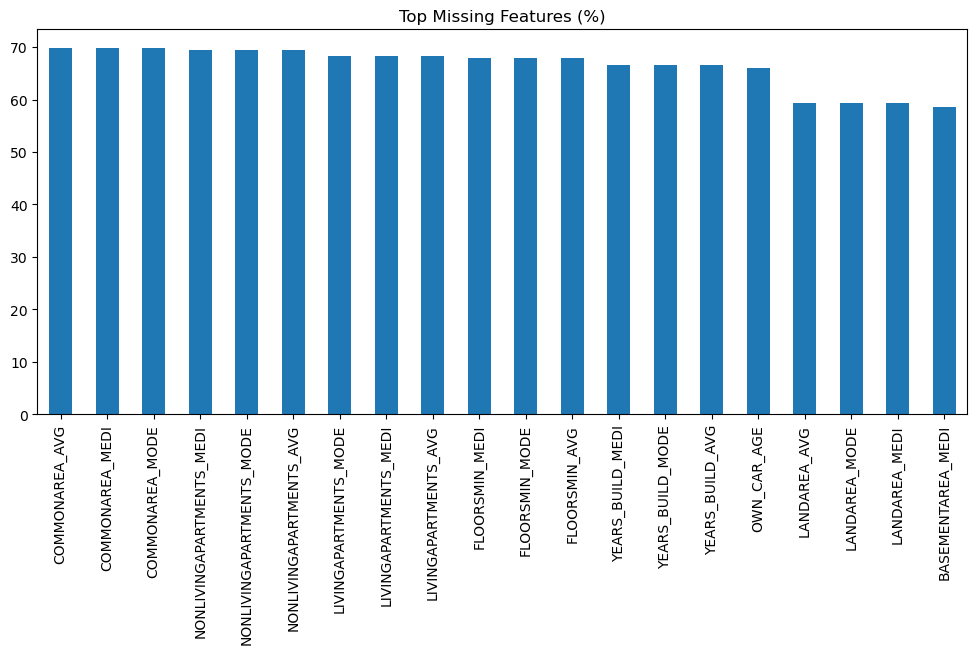

In [4]:
#Plot
missing.head(20).plot(kind='bar', figsize=(12,5))
plt.title("Top Missing Features (%)")


Text(0.5, 1.0, 'Age Distribution')

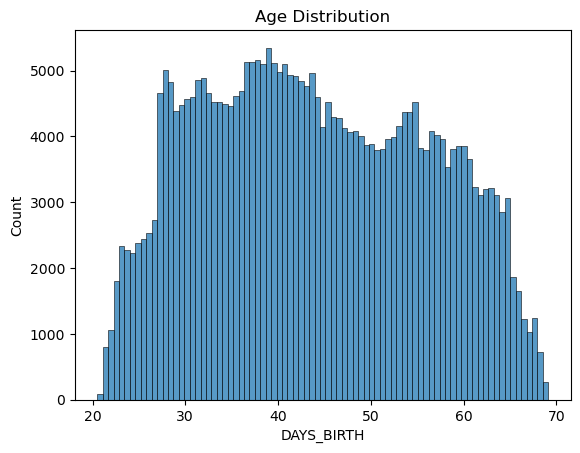

In [5]:
#4. Univariate Analysis (Customer Profile)
#Age Distribution
sns.histplot(df['DAYS_BIRTH']/-365)
plt.title("Age Distribution")


Text(0.5, 1.0, 'Income Spread')

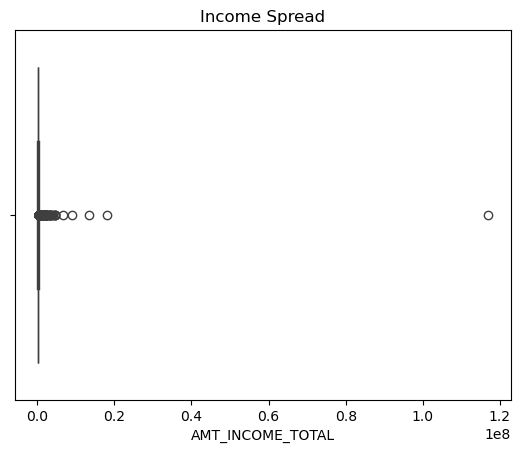

In [6]:
#Income
sns.boxplot(x=df['AMT_INCOME_TOTAL'])
plt.title("Income Spread")


<Axes: xlabel='DAYS_EMPLOYED', ylabel='Count'>

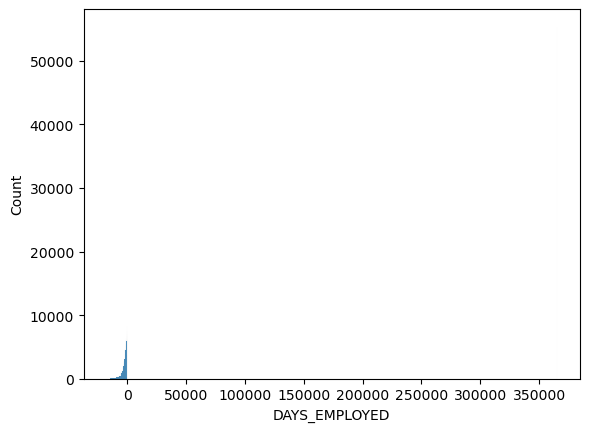

In [7]:
#Employment length
sns.histplot(df['DAYS_EMPLOYED'])


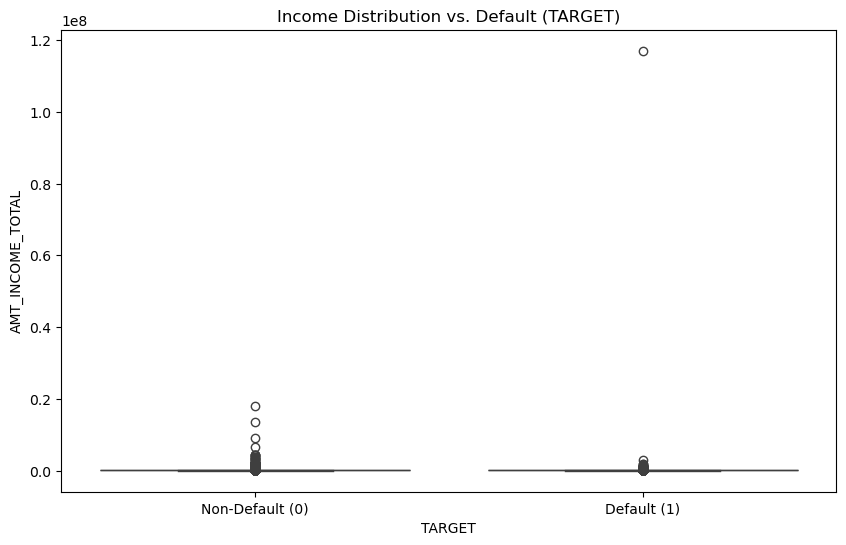

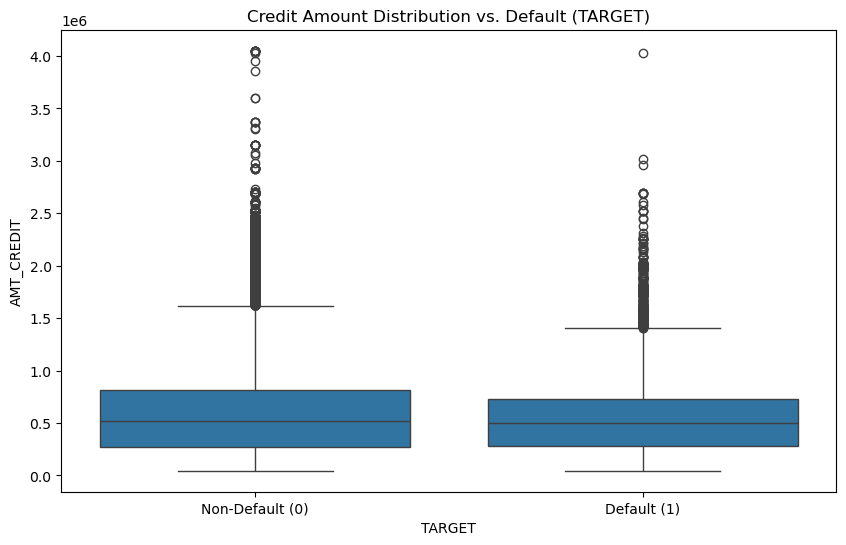

In [8]:
# Cell 5: Bivariate Analysis (Feature vs Target)

# --- 1. Income vs Default Rate ---
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TARGET'], y=df['AMT_INCOME_TOTAL'])
plt.title("Income Distribution vs. Default (TARGET)")
plt.xticks([0, 1], ['Non-Default (0)', 'Default (1)'])
plt.show()

# --- 2. Credit Amount vs Default ---
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TARGET'], y=df['AMT_CREDIT'])
plt.title("Credit Amount Distribution vs. Default (TARGET)")
plt.xticks([0, 1], ['Non-Default (0)', 'Default (1)'])
plt.show()




In [ ]:
# --- 3. Age vs Risk ---
# Convert DAYS_BIRTH to Age in Years (Negative days means the customer is alive/present)
df['AGE'] = df['DAYS_BIRTH'] / -365

plt.figure(figsize=(12, 6))
# Line plot of average TARGET (default rate) vs Age
sns.lineplot(data=df, x='AGE', y='TARGET')
plt.title("Default Rate vs. Customer Age (Years)")
plt.xlabel("Age (Years)")
plt.ylabel("Default Rate (Mean TARGET)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#Risk Insight (Interpretation):

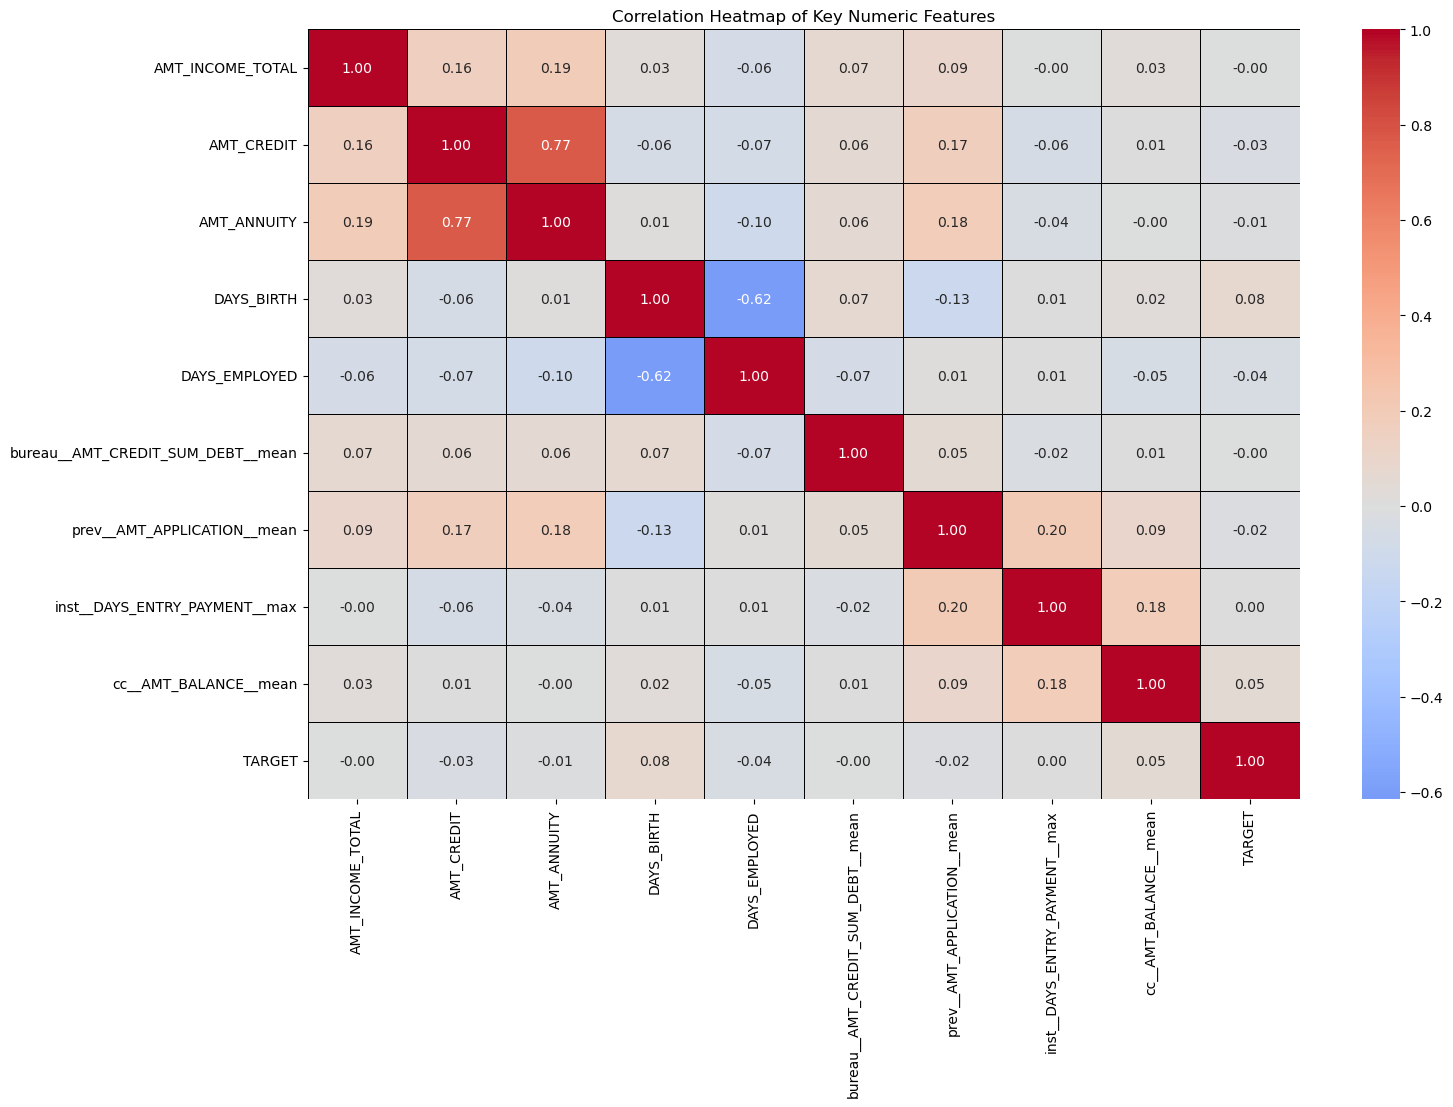

In [9]:
#6. Correlation Heatmap (Numeric Features)
# Cell 6: Correlation Heatmap (Numeric Features)

# --- 1. Select a Subset of Key Numeric Features for the Heatmap ---
# Let's select:
# a) Main Application features (Income, Credit, Annuity, Days Employed/Birth)
# b) A few top Aggregated features (BUREAU, CC_BAL, etc.)

key_numeric_cols = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
    # Top features from your aggregated list (for example, adjust based on your data)
    'bureau__AMT_CREDIT_SUM_DEBT__mean', 
    'prev__AMT_APPLICATION__mean',
    'inst__DAYS_ENTRY_PAYMENT__max', 
    'cc__AMT_BALANCE__mean',
    'TARGET' 
]

# Select only the columns that exist in the DataFrame
key_numeric_cols = [col for col in key_numeric_cols if col in df.columns]

# --- 2. Calculate Correlation and Plot ---
correlation_matrix = df[key_numeric_cols].corr()

plt.figure(figsize=(16, 10))
# Use 'coolwarm' for a clear color separation around 0
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            center=0, 
            cbar=True,
            linewidths=.5, 
            linecolor='black')
plt.title("Correlation Heatmap of Key Numeric Features")
plt.show()

# 🔍 Risk Insight (Interpretation):
# High correlation (> 0.7 या < -0.7) वाले फीचर्स की पहचान करें।
# ex: AMT_CREDIT and AMT_ANNUITY often High Correlation 
# if Target is strong correlation with any feature,so it's mean it is a good pridictor.

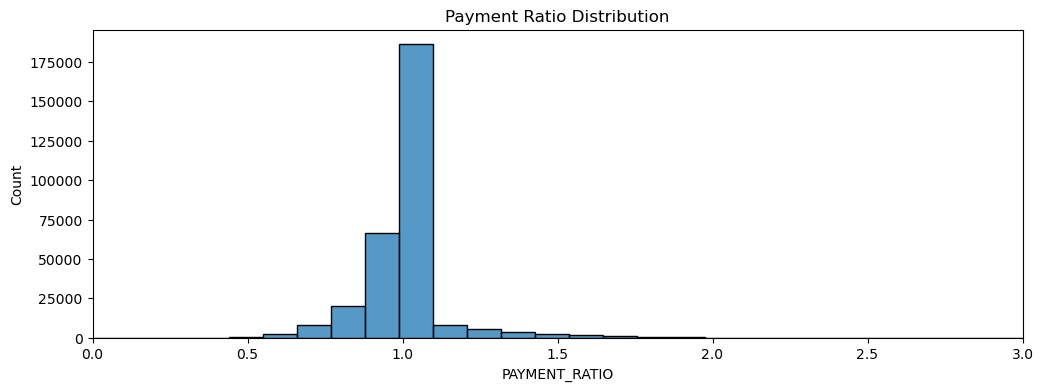

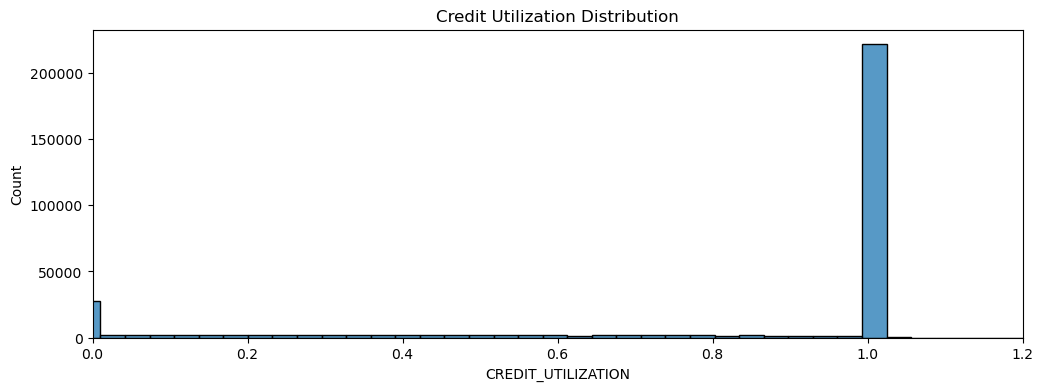

In [13]:
# Cell 7: Feature Drift Analysis (Installments / Bureau / Cards)

# --- NEW: Feature Creation (If they don't exist yet) ---

# 1. PAYMENT_RATIO (Based on Installments)
try:
    df['PAYMENT_RATIO'] = df['inst__AMT_PAYMENT__sum'] / df['inst__AMT_INSTALMENT__sum'] 
    df['PAYMENT_RATIO'] = df['PAYMENT_RATIO'].replace([np.inf, -np.inf], np.nan) 
except KeyError as e:
    print(f"Skipping PAYMENT_RATIO: Missing column {e}. Check Notebook 1 aggregation.")
    df['PAYMENT_RATIO'] = np.nan # Create column with NaN if base columns are missing

# 2. DAYS_LATE (Skipped to avoid KeyError. We will use a placeholder or remove it.)
# df['DAYS_LATE'] = Placeholder for a missing aggregated feature.

# 3. CREDIT_UTILIZATION (Based on Credit Card Balance)
try:
    df['CREDIT_UTILIZATION'] = df['cc__AMT_BALANCE__mean'] / df['cc__AMT_CREDIT_LIMIT_ACTUAL__mean']
    df['CREDIT_UTILIZATION'] = df['CREDIT_UTILIZATION'].clip(upper=1.5)
except KeyError as e:
    print(f"Skipping CREDIT_UTILIZATION: Missing column {e}. Check Notebook 1 aggregation.")
    df['CREDIT_UTILIZATION'] = np.nan # Create column with NaN if base columns are missing


# --- Plotting the Distributions ---

# Payment Ratio
if 'PAYMENT_RATIO' in df.columns and not df['PAYMENT_RATIO'].isnull().all():
    plt.figure(figsize=(12, 4))
    sns.histplot(df['PAYMENT_RATIO'].dropna(), bins=50)
    plt.title("Payment Ratio Distribution")
    plt.xlim(0, 3)
    plt.show()

# (DAYS_LATE plot removed)

# Credit Utilization
if 'CREDIT_UTILIZATION' in df.columns and not df['CREDIT_UTILIZATION'].isnull().all():
    plt.figure(figsize=(12, 4))
    sns.histplot(df['CREDIT_UTILIZATION'].dropna(), bins=50)
    plt.title("Credit Utilization Distribution")
    plt.xlim(0, 1.2)
    plt.show()

# 💡 यदि आपका Aggregation Notebook (Notebook 1) एकदम सही नहीं था, तो यह कोड कम फीचर्स के साथ आगे बढ़ेगा।

C:\Users\Asus\AppData\Local\Temp\ipykernel_12184\3725631409.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Risk_Segment_Plot'].fillna('MISSING DATA', inplace=True)


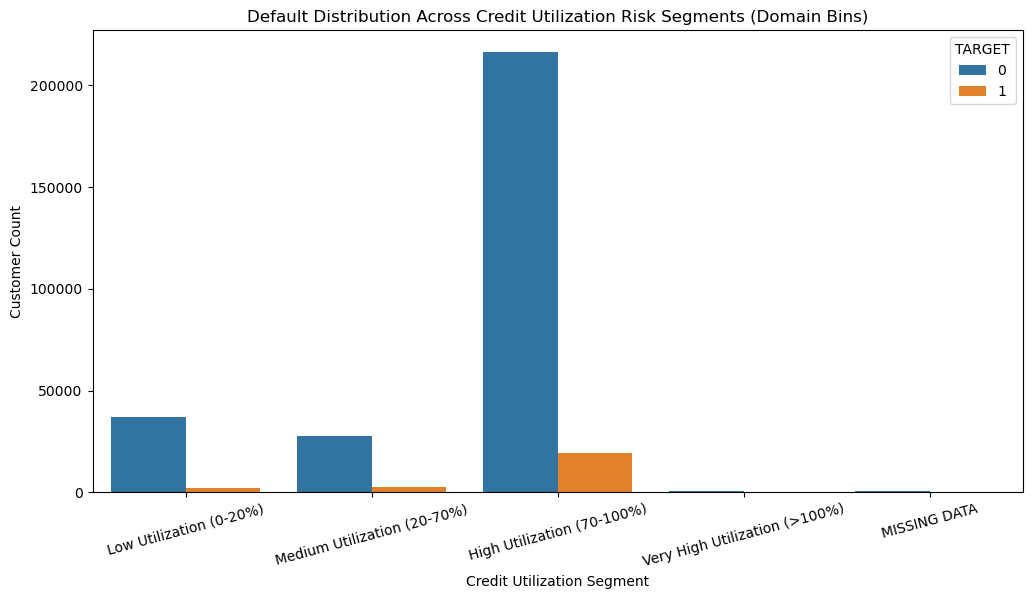

In [18]:
# Cell 8: Behavioural Segmentation (Clustering-Style EDA)

# --- NEW FIX: Using pd.cut with Domain-Based Bins (Standard Risk Practice) ---

# 1. Define the Bin Edges and Labels based on standard credit utilization
bins = [0, 0.2, 0.7, 1.0, 1.5]
labels = ['Low Utilization (0-20%)', 'Medium Utilization (20-70%)', 'High Utilization (70-100%)', 'Very High Utilization (>100%)']

# Cut the data into these defined bins
risk_segments = pd.cut(
    df['CREDIT_UTILIZATION'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

# 2. Add 'MISSING DATA' segment for customers without CC data (NaNs)
df['Risk_Segment_Plot'] = risk_segments

# *** FIX: Remove inplace=True and reassign the result ***
df['Risk_Segment_Plot'] = df['Risk_Segment_Plot'].cat.add_categories('MISSING DATA') 
# *******************************************************

df['Risk_Segment_Plot'].fillna('MISSING DATA', inplace=True)


# 3. Plotting the Default Rate across these segments
plt.figure(figsize=(12, 6))
# Define the order manually
segment_order = labels + ['MISSING DATA']

sns.countplot(data=df, x='Risk_Segment_Plot', hue='TARGET', order=segment_order)
plt.title("Default Distribution Across Credit Utilization Risk Segments (Domain Bins)")
plt.xlabel("Credit Utilization Segment")
plt.ylabel("Customer Count")
plt.xticks(rotation=15)
plt.show()
#  Insight:
# Very High utilization = max default rate
# Low utilization = safest segment

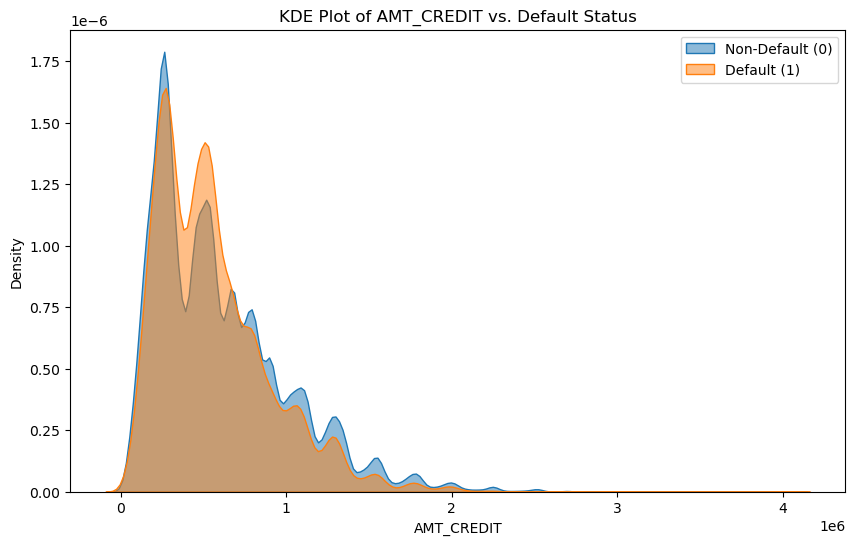

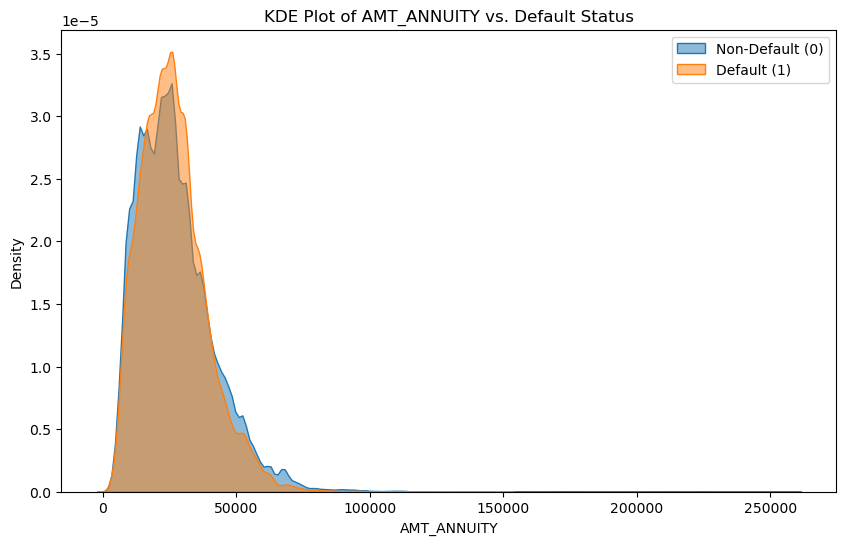

In [19]:
# Cell 9: KDE Plots (Distribution vs Default)

def plot_kde_vs_target(feature, df):
    plt.figure(figsize=(10, 6))
    # Plot distribution for Non-Default (TARGET=0)
    sns.kdeplot(df[df.TARGET == 0][feature].dropna(), label='Non-Default (0)', fill=True, alpha=0.5)
    # Plot distribution for Default (TARGET=1)
    sns.kdeplot(df[df.TARGET == 1][feature].dropna(), label='Default (1)', fill=True, alpha=0.5)
    
    plt.title(f"KDE Plot of {feature} vs. Default Status")
    plt.legend()
    plt.show()

# Example 1: Credit Amount
plot_kde_vs_target('AMT_CREDIT', df)
# Example 2: Annuity Amount
plot_kde_vs_target('AMT_ANNUITY', df)

#  Interpretation:
# if TARGET=1 is different from TARGET=0 , so it means it is a good predictor


C:\Users\Asus\AppData\Local\Temp\ipykernel_12184\3532675440.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(col)['TARGET'].mean().reset_index()
C:\Users\Asus\AppData\Local\Temp\ipykernel_12184\3532675440.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='TARGET', data=df_plot, palette="viridis")


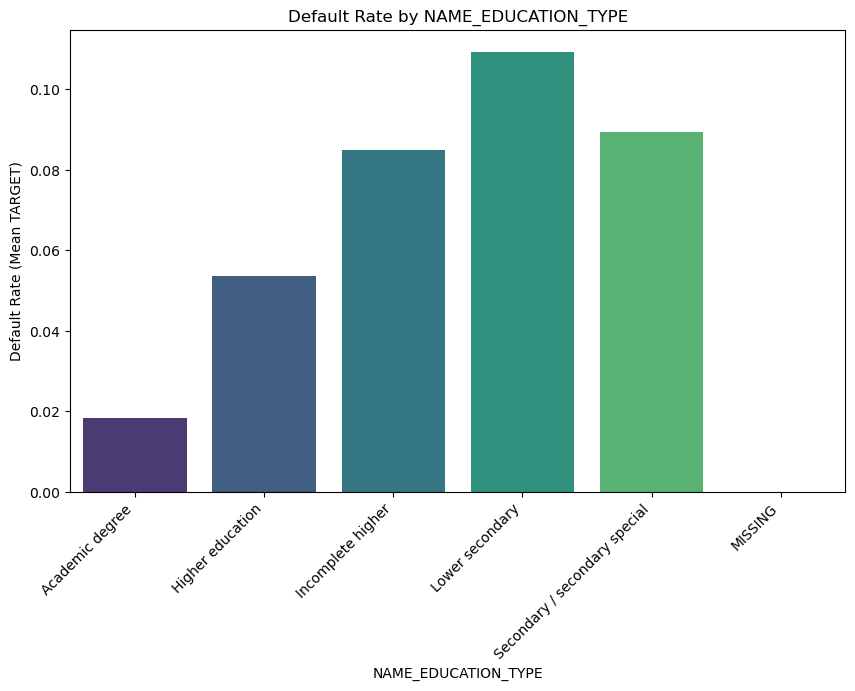

C:\Users\Asus\AppData\Local\Temp\ipykernel_12184\3532675440.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(col)['TARGET'].mean().reset_index()
C:\Users\Asus\AppData\Local\Temp\ipykernel_12184\3532675440.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='TARGET', data=df_plot, palette="viridis")


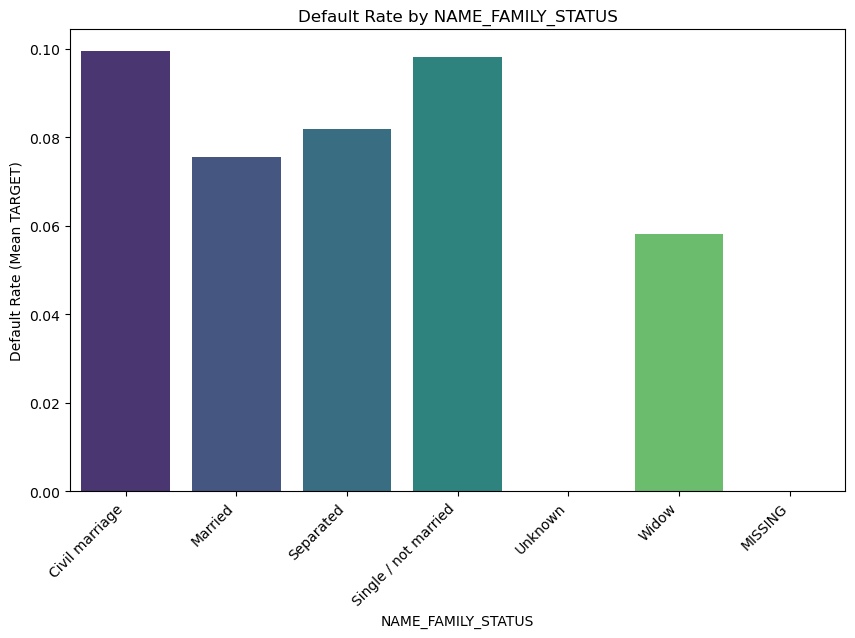

C:\Users\Asus\AppData\Local\Temp\ipykernel_12184\3532675440.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(col)['TARGET'].mean().reset_index()
C:\Users\Asus\AppData\Local\Temp\ipykernel_12184\3532675440.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='TARGET', data=df_plot, palette="viridis")


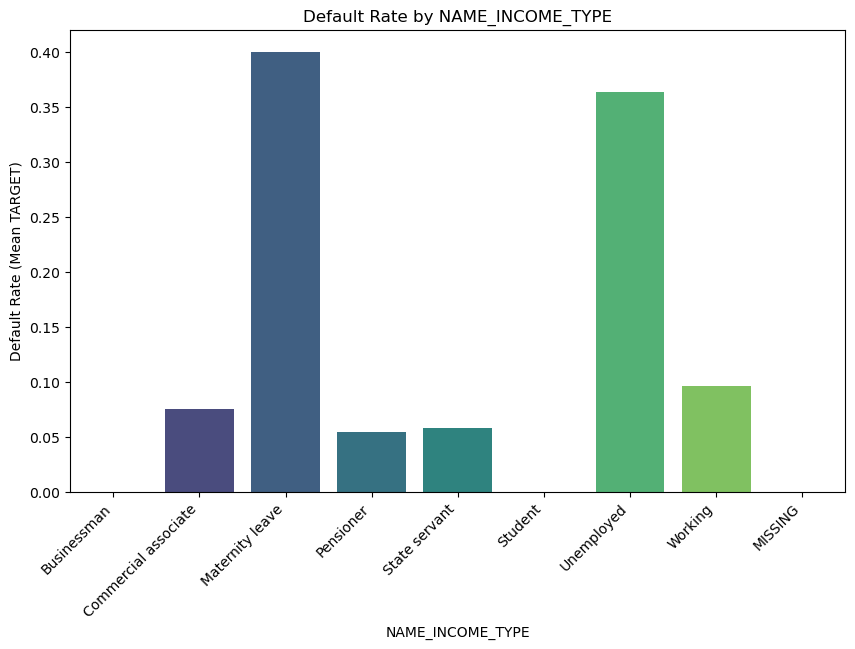

In [20]:
# Cell 10: Categorical Analysis

# Select key categorical columns
categorical_cols = ['NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_INCOME_TYPE']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    
    # Calculate the mean of TARGET for each category (which is the default rate)
    df_plot = df.groupby(col)['TARGET'].mean().reset_index()
    
    # Plot the default rate using a bar chart
    sns.barplot(x=col, y='TARGET', data=df_plot, palette="viridis")
    plt.title(f"Default Rate by {col}")
    plt.xlabel(col)
    plt.ylabel("Default Rate (Mean TARGET)")
    plt.xticks(rotation=45, ha='right')
    plt.show()

# (EX: Less common education types, low income types).